In [1]:
import numpy as np
import xarray as xr
import copy 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plot_path = '/home/u/u241308/figures/'

# MPI-GE 

In [2]:
ref_hist_min = 1850
ref_hist_max = 1879

In [3]:
#Historical
path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens1_30/' #first 30 members
file = 'nGE_GMT_HIST_ym.nc'
GMT_hist_1 = xr.open_dataset(path+file)
GMT_hist_1 = GMT_hist_1.tas

path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens31_50/' #second 20 members
file = 'nGE_GMT_HIST_ym.nc'
GMT_hist_2 = xr.open_dataset(path+file)
GMT_hist_2 = GMT_hist_2.tas

GMT_hist = xr.concat((GMT_hist_1,GMT_hist_2),'height') #concatenate 50 members
GMT_hist_mean = GMT_hist.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)
GMT_hist_ens = GMT_hist.mean(axis=(2,3)) #average over lon/lat (non existent)

GMT_ref = GMT_hist_mean[(GMT_hist_mean.time.dt.year>=ref_hist_min)&(GMT_hist_mean.time.dt.year<=ref_hist_max)].mean()
GMT_ref_ens = GMT_hist_ens[(GMT_hist_ens.time.dt.year>=ref_hist_min)&(GMT_hist_ens.time.dt.year<=ref_hist_max)].mean(axis=0)

#ssp245
path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens1_30/' #first 30 members
file = 'nGE_GMT_ssp245_ym.nc'
GMT_ssp245_1 = xr.open_dataset(path+file)
GMT_ssp245_1 = GMT_ssp245_1.tas

path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens31_50/' #second 20 members
file = 'nGE_GMT_ssp245_ym.nc'
GMT_ssp245_2 = xr.open_dataset(path+file)
GMT_ssp245_2 = GMT_ssp245_2.tas

GMT_ssp245 = xr.concat((GMT_ssp245_1,GMT_ssp245_2),'height') #concatenate 50 members
GMT_ssp245_mean = GMT_ssp245.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)
GMT_ssp245_ens = GMT_ssp245.mean(axis=(2,3)) #average over lon/lat (non existent)

#ssp585
path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens1_30/' #first 30 members
file = 'nGE_GMT_ssp585_ym.nc'
GMT_ssp585_1 = xr.open_dataset(path+file)
GMT_ssp585_1 = GMT_ssp585_1.tas

path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens31_50/' #second 20 members
file = 'nGE_GMT_ssp585_ym.nc'
GMT_ssp585_2 = xr.open_dataset(path+file)
GMT_ssp585_2 = GMT_ssp585_2.tas

GMT_ssp585 = xr.concat((GMT_ssp585_1,GMT_ssp585_2),'height') #concatenate 50 members
GMT_ssp585_mean = GMT_ssp585.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)
GMT_ssp585_ens = GMT_ssp585.mean(axis=(2,3)) #average over lon/lat (non existent)

#compute anomalies for ensemble mean
GMTA_hist_mean = GMT_hist_mean - GMT_ref
GMTA_ssp245_mean = GMT_ssp245_mean - GMT_ref
GMTA_ssp585_mean = GMT_ssp585_mean - GMT_ref

out_data_GMTA = []
out_data_GMTA.append(GMTA_hist_mean)
out_data_GMTA.append(GMTA_ssp245_mean)
out_data_GMTA.append(GMTA_ssp585_mean)

# Rest of SMILES

In [4]:
model_list = ['MIROC6','ACCESS-ESM1-5','CanESM5']
ens_total = [50,40,50]

# Load data

In [5]:
#Load ACCESS
path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/t2max_trend_smile/'

file = 't2max_JJA_mean_regress_grid_access.npy'
t2max_JJA_mean_regress_grid_access = np.load(path+file)
file = 't2max_JJA_std_regress_grid_access.npy'
t2max_JJA_std_regress_grid_access = np.load(path+file)
file = 't2max_JJA_pct_mean_regress_grid_access.npy'
t2max_JJA_pct_mean_regress_grid_access = np.load(path+file)
file = 't2max_JJA_pct_std_regress_grid_access.npy'
t2max_JJA_pct_std_regress_grid_access = np.load(path+file)

#latitudes are inverted
t2max_JJA_mean_regress_grid_access = t2max_JJA_mean_regress_grid_access[::-1]
t2max_JJA_std_regress_grid_access = t2max_JJA_std_regress_grid_access[::-1]
t2max_JJA_pct_mean_regress_grid_access = t2max_JJA_pct_mean_regress_grid_access[::-1]
t2max_JJA_pct_std_regress_grid_access = t2max_JJA_pct_std_regress_grid_access[::-1]

In [6]:
#Load canesm
path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/t2max_trend_smile/'

file = 't2max_JJA_mean_regress_grid_canesm.npy'
t2max_JJA_mean_regress_grid_canesm = np.load(path+file)
file = 't2max_JJA_std_regress_grid_canesm.npy'
t2max_JJA_std_regress_grid_canesm = np.load(path+file)
file = 't2max_JJA_pct_mean_regress_grid_canesm.npy'
t2max_JJA_pct_mean_regress_grid_canesm = np.load(path+file)
file = 't2max_JJA_pct_std_regress_grid_canesm.npy'
t2max_JJA_pct_std_regress_grid_canesm = np.load(path+file)

#latitudes are inverted
t2max_JJA_mean_regress_grid_canesm = t2max_JJA_mean_regress_grid_canesm[::-1]
t2max_JJA_std_regress_grid_canesm = t2max_JJA_std_regress_grid_canesm[::-1]
t2max_JJA_pct_mean_regress_grid_canesm = t2max_JJA_pct_mean_regress_grid_canesm[::-1]
t2max_JJA_pct_std_regress_grid_canesm = t2max_JJA_pct_std_regress_grid_canesm[::-1]

In [7]:
#Load miroc
path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/t2max_trend_smile/'

file = 't2max_JJA_mean_regress_grid_miroc.npy'
t2max_JJA_mean_regress_grid_miroc = np.load(path+file)
file = 't2max_JJA_std_regress_grid_miroc.npy'
t2max_JJA_std_regress_grid_miroc = np.load(path+file)
file = 't2max_JJA_pct_mean_regress_grid_miroc.npy'
t2max_JJA_pct_mean_regress_grid_miroc = np.load(path+file)
file = 't2max_JJA_pct_std_regress_grid_miroc.npy'
t2max_JJA_pct_std_regress_grid_miroc = np.load(path+file)

In [8]:
#Load mpi
path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/t2max_trend_smile/'

file = 't2max_JJA_mean_regress_grid_mpi.npy'
t2max_JJA_mean_regress_grid_mpi = np.load(path+file)
file = 't2max_JJA_std_regress_grid_mpi.npy'
t2max_JJA_std_regress_grid_mpi = np.load(path+file)
file = 't2max_JJA_pct_mean_regress_grid_mpi.npy'
t2max_JJA_pct_mean_regress_grid_mpi = np.load(path+file)
file = 't2max_JJA_pct_std_regress_grid_mpi.npy'
t2max_JJA_pct_std_regress_grid_mpi = np.load(path+file)

In [9]:
t2max_JJA_pct_mean_regress_grid_access = np.where(t2max_JJA_pct_mean_regress_grid_mpi==0,0,t2max_JJA_pct_mean_regress_grid_access)
t2max_JJA_mean_regress_grid_access = np.where(t2max_JJA_pct_mean_regress_grid_mpi==0,0,t2max_JJA_mean_regress_grid_access)

t2max_JJA_pct_mean_regress_grid_canesm = np.where(t2max_JJA_pct_mean_regress_grid_mpi==0,0,t2max_JJA_pct_mean_regress_grid_canesm)
t2max_JJA_mean_regress_grid_canesm = np.where(t2max_JJA_pct_mean_regress_grid_mpi==0,0,t2max_JJA_mean_regress_grid_canesm)

t2max_JJA_pct_mean_regress_grid_miroc = np.where(t2max_JJA_pct_mean_regress_grid_mpi==0,0,t2max_JJA_pct_mean_regress_grid_miroc)
t2max_JJA_mean_regress_grid_miroc = np.where(t2max_JJA_pct_mean_regress_grid_mpi==0,0,t2max_JJA_mean_regress_grid_miroc)

In [10]:
#for plotting axis
path = '/work/uo1075/u241308/grand_ensemble_cmip6/t2max/'
file = 'nGE_Tmax_ssp245_dm_land_europe.nc'

with xr.open_dataset(path+file) as data1:
    data1 = data1.tasmax[0]

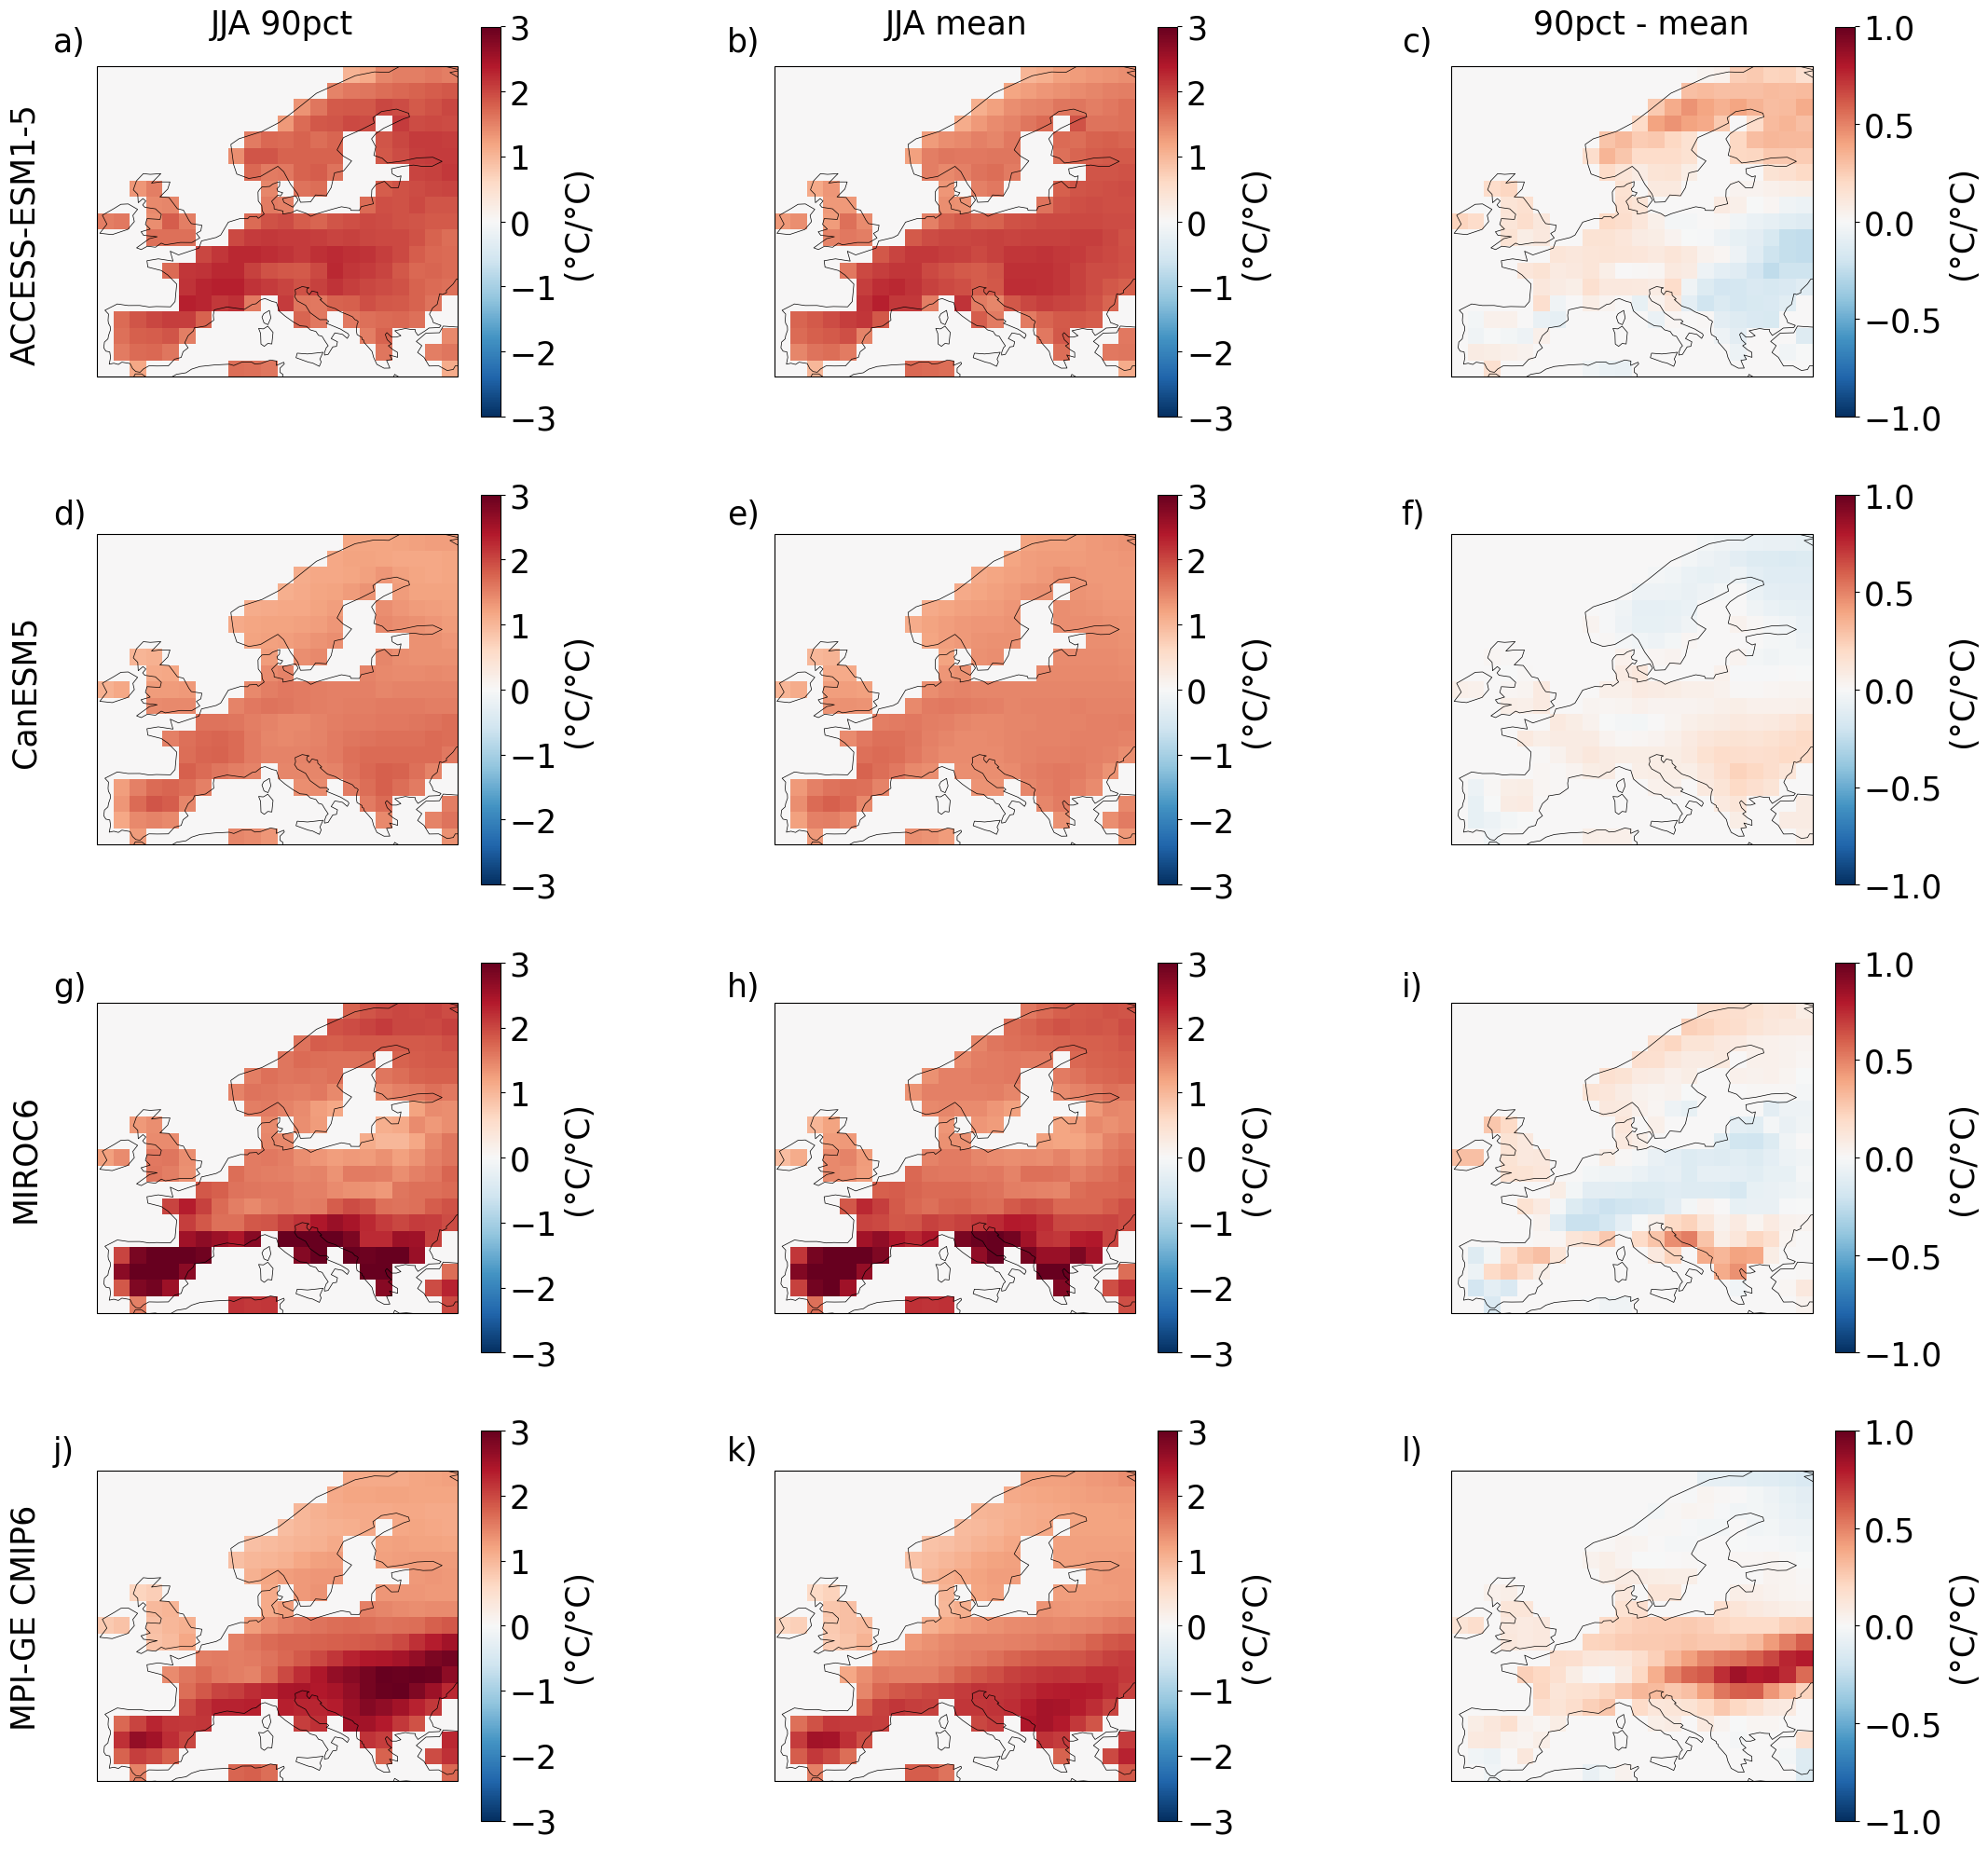

In [14]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(4, 3)
gs.update(wspace=0.5)
fig = plt.figure(figsize=(25,25))
plt.rcParams.update({'font.size': 25})

# ------------------------------- Access ---------------------------------
ax1 = plt.subplot(gs[0, :1], projection=ccrs.PlateCarree())
plt.pcolormesh(data1.lon,data1.lat,t2max_JJA_pct_mean_regress_grid_access,cmap=plt.cm.get_cmap('RdBu_r'),vmin=-3,vmax=3)
plt.colorbar(label='(°C/°C)')
ax1.coastlines(resolution='110m',lw=0.5,color='k'); ax1.set_facecolor('w')

ax2 = plt.subplot(gs[0, 1:2], projection=ccrs.PlateCarree())
plt.pcolormesh(data1.lon,data1.lat,t2max_JJA_mean_regress_grid_access,cmap=plt.cm.get_cmap('RdBu_r'),vmin=-3,vmax=3)
plt.colorbar(label='(°C/°C)')
ax2.coastlines(resolution='110m',lw=0.5,color='k'); ax2.set_facecolor('w')

ax2 = plt.subplot(gs[0, 2:3], projection=ccrs.PlateCarree())
plt.pcolormesh(data1.lon,data1.lat,t2max_JJA_pct_mean_regress_grid_access-t2max_JJA_mean_regress_grid_access,cmap=plt.cm.get_cmap('RdBu_r'),vmin=-1,vmax=1)
plt.colorbar(label='(°C/°C)')
ax2.coastlines(resolution='110m',lw=0.5,color='k'); ax2.set_facecolor('w')

# ------------------------------- CanESM ---------------------------------
ax1 = plt.subplot(gs[1, :1], projection=ccrs.PlateCarree())
plt.pcolormesh(data1.lon,data1.lat,t2max_JJA_pct_mean_regress_grid_canesm,cmap=plt.cm.get_cmap('RdBu_r'),vmin=-3,vmax=3)
plt.colorbar(label='(°C/°C)')
ax1.coastlines(resolution='110m',lw=0.5,color='k'); ax1.set_facecolor('w')

ax2 = plt.subplot(gs[1, 1:2], projection=ccrs.PlateCarree())
plt.pcolormesh(data1.lon,data1.lat,t2max_JJA_mean_regress_grid_canesm,cmap=plt.cm.get_cmap('RdBu_r'),vmin=-3,vmax=3)
plt.colorbar(label='(°C/°C)')
ax2.coastlines(resolution='110m',lw=0.5,color='k'); ax2.set_facecolor('w')

ax2 = plt.subplot(gs[1, 2:3], projection=ccrs.PlateCarree())
plt.pcolormesh(data1.lon,data1.lat,t2max_JJA_pct_mean_regress_grid_canesm-t2max_JJA_mean_regress_grid_canesm,cmap=plt.cm.get_cmap('RdBu_r'),vmin=-1,vmax=1)
plt.colorbar(label='(°C/°C)')
ax2.coastlines(resolution='110m',lw=0.5,color='k'); ax2.set_facecolor('w')

# ------------------------------- MIROC ---------------------------------
ax1 = plt.subplot(gs[2, :1], projection=ccrs.PlateCarree())
plt.pcolormesh(data1.lon,data1.lat,t2max_JJA_pct_mean_regress_grid_miroc,cmap=plt.cm.get_cmap('RdBu_r'),vmin=-3,vmax=3)
plt.colorbar(label='(°C/°C)')
ax1.coastlines(resolution='110m',lw=0.5,color='k'); ax1.set_facecolor('w')

ax2 = plt.subplot(gs[2, 1:2], projection=ccrs.PlateCarree())
plt.pcolormesh(data1.lon,data1.lat,t2max_JJA_mean_regress_grid_miroc,cmap=plt.cm.get_cmap('RdBu_r'),vmin=-3,vmax=3)
plt.colorbar(label='(°C/°C)')
ax2.coastlines(resolution='110m',lw=0.5,color='k'); ax2.set_facecolor('w')

ax2 = plt.subplot(gs[2, 2:3], projection=ccrs.PlateCarree())
plt.pcolormesh(data1.lon,data1.lat,t2max_JJA_pct_mean_regress_grid_miroc-t2max_JJA_mean_regress_grid_miroc,cmap=plt.cm.get_cmap('RdBu_r'),vmin=-1,vmax=1)
plt.colorbar(label='(°C/°C)')
ax2.coastlines(resolution='110m',lw=0.5,color='k'); ax2.set_facecolor('w')

# ------------------------------- MPI ---------------------------------
ax1 = plt.subplot(gs[3, :1], projection=ccrs.PlateCarree())
plt.pcolormesh(data1.lon,data1.lat,t2max_JJA_pct_mean_regress_grid_mpi,cmap=plt.cm.get_cmap('RdBu_r'),vmin=-3,vmax=3)
plt.colorbar(label='(°C/°C)')
ax1.coastlines(resolution='110m',lw=0.5,color='k'); ax1.set_facecolor('w')

ax2 = plt.subplot(gs[3, 1:2], projection=ccrs.PlateCarree())
plt.pcolormesh(data1.lon,data1.lat,t2max_JJA_mean_regress_grid_mpi,cmap=plt.cm.get_cmap('RdBu_r'),vmin=-3,vmax=3)
plt.colorbar(label='(°C/°C)')
ax2.coastlines(resolution='110m',lw=0.5,color='k'); ax2.set_facecolor('w')

ax2 = plt.subplot(gs[3, 2:3], projection=ccrs.PlateCarree())
plt.pcolormesh(data1.lon,data1.lat,t2max_JJA_pct_mean_regress_grid_mpi-t2max_JJA_mean_regress_grid_mpi,cmap=plt.cm.get_cmap('RdBu_r'),vmin=-1,vmax=1)
plt.colorbar(label='(°C/°C)')
ax2.coastlines(resolution='110m',lw=0.5,color='k'); ax2.set_facecolor('w')

#model names
plt.text(-175,198,'ACCESS-ESM1-5',rotation='vertical')
plt.text(-175,152,'CanESM5',rotation='vertical')
plt.text(-175,100,'MIROC6',rotation='vertical')
plt.text(-175,42,'MPI-GE CMIP6',rotation='vertical')

plt.text(-152,235,'JJA 90pct')
plt.text(-75,235,'JJA mean')
plt.text(-1,235,'90pct - mean')

plt.text(-170,233,'a)')
plt.text(-93,233,'b)')
plt.text(-16,233,'c)')

plt.text(-170,179,'d)')
plt.text(-93,179,'e)')
plt.text(-16,179,'f)')

plt.text(-170,125,'g)')
plt.text(-93,125,'h)')
plt.text(-16,125,'i)')

plt.text(-170,72,'j)')
plt.text(-93,72,'k)')
plt.text(-16,72,'l)')

plt.savefig(plot_path + 'FINAL_SMILE_appendix_1',bbox_inches="tight",dpi=300) #dpi=600)

In [15]:
t2max_JJA_pct_std_regress_grid_access = np.where(t2max_JJA_pct_std_regress_grid_mpi==0,0,t2max_JJA_pct_std_regress_grid_access)
t2max_JJA_pct_std_regress_grid_canesm = np.where(t2max_JJA_pct_std_regress_grid_mpi==0,0,t2max_JJA_pct_std_regress_grid_canesm)
t2max_JJA_pct_std_regress_grid_miroc = np.where(t2max_JJA_pct_std_regress_grid_mpi==0,0,t2max_JJA_pct_std_regress_grid_miroc)

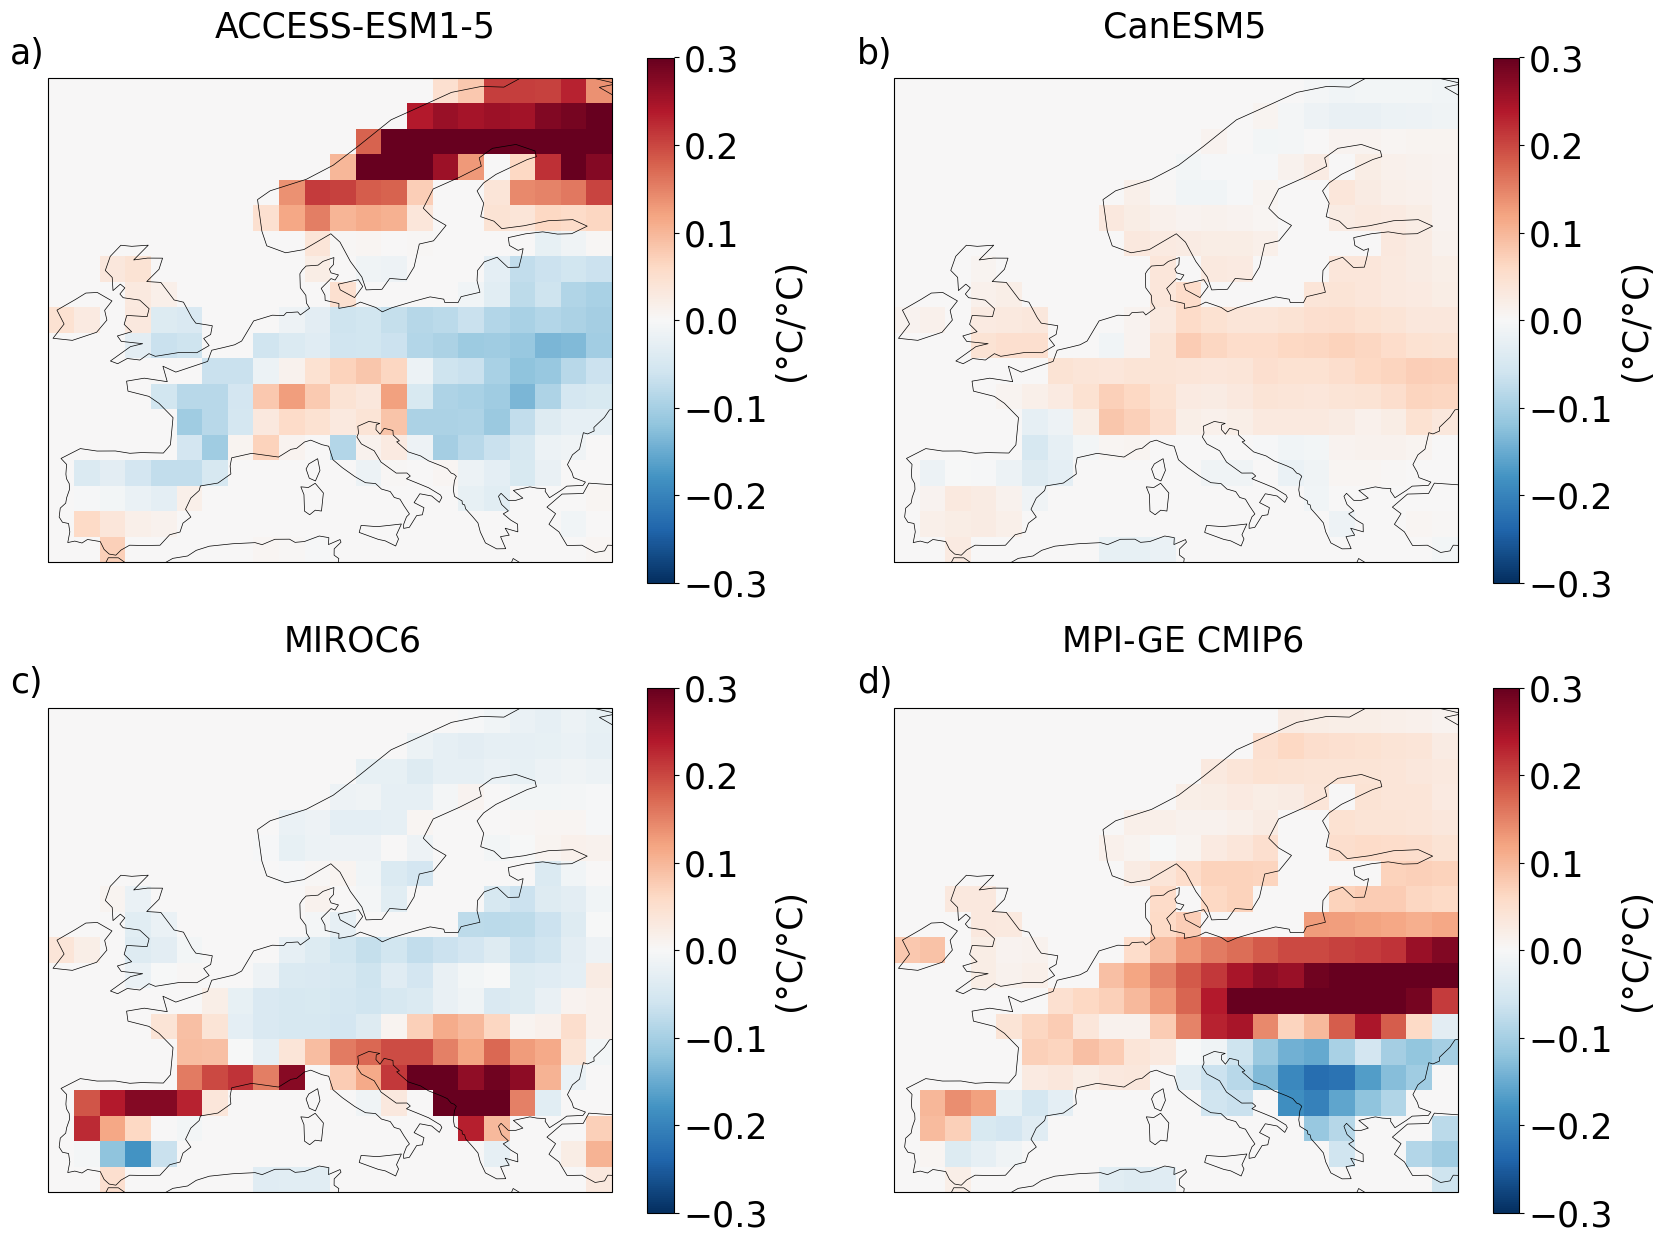

In [19]:
fig = plt.figure(figsize=(20,15))
plt.rcParams.update({'font.size': 25})

ax = fig.add_subplot(2,2,1, projection=ccrs.PlateCarree())
plt.pcolormesh(data1.lon,data1.lat,t2max_JJA_pct_std_regress_grid_access,cmap=plt.cm.get_cmap('RdBu_r'),vmin=-0.3,vmax=0.3)
plt.colorbar(label='(°C/°C)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

ax = fig.add_subplot(2,2,2, projection=ccrs.PlateCarree())
plt.pcolormesh(data1.lon,data1.lat,t2max_JJA_pct_std_regress_grid_canesm,cmap=plt.cm.get_cmap('RdBu_r'),vmin=-0.3,vmax=0.3)
plt.colorbar(label='(°C/°C)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

ax = fig.add_subplot(2,2,3, projection=ccrs.PlateCarree())
plt.pcolormesh(data1.lon,data1.lat,t2max_JJA_pct_std_regress_grid_miroc,cmap=plt.cm.get_cmap('RdBu_r'),vmin=-0.3,vmax=0.3)
plt.colorbar(label='(°C/°C)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

ax = fig.add_subplot(2,2,4, projection=ccrs.PlateCarree())
plt.pcolormesh(data1.lon,data1.lat,t2max_JJA_pct_std_regress_grid_mpi,cmap=plt.cm.get_cmap('RdBu_r'),vmin=-0.3,vmax=0.3)
plt.colorbar(label='(°C/°C)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

#model names
plt.text(-60,120,'ACCESS-ESM1-5')
plt.text(5,120,'CanESM5')
plt.text(-55,75,'MIROC6')
plt.text(2,75,'MPI-GE CMIP6')

plt.text(-75,118,'a)')
plt.text(-13,118,'b)')
plt.text(-75,72,'c)')
plt.text(-13,72,'d)')

plt.savefig(plot_path + 'FINAL_SMILE_appendix_2',bbox_inches="tight",dpi=300) #dpi=600)